In [3]:
import random as python_random
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)


# Overflow Analysis

In prelimPlotting.ipynb, I noticed that when plotting the relative species concentrations vs the relative flux values, the graphs demonstrated a tilted hourglass pattern. 
The graphs seemed to demonstrate the same two asymptotes: $y=x$ and $y=1$.

For the linear systems, the datapoints seemed to rigidly adhere to these boundaries. However, for the branched system, the datapoints crossed the boundaries if the species was not on the same branch where the perturbation was made.

In this overflow analysis, I isolate the branched 6-step system datapoints that crossed the boundary and plot them against different aspects of the simulated data.

In [5]:
# The datasets of interest:
MArel = pd.read_csv(f'6br/MAdata_6stbr_e1.csv')
u_e1_s1_j5 = MArel.loc[((MArel['relative_flux_J5'] < 1) & (MArel['rel_s1'] < MArel['relative_flux_J5'])) | ((MArel['relative_flux_J5'] > 1) & (MArel['rel_s1'] > MArel['relative_flux_J5']))]
u_e1_s1_j6 = MArel.loc[((MArel['relative_flux_J6'] < 1) & (MArel['rel_s1'] < MArel['relative_flux_J6'])) | ((MArel['relative_flux_J6'] > 1) & (MArel['rel_s1'] > MArel['relative_flux_J6']))]

MArel = pd.read_csv(f'6br/MAdata_6stbr_e2.csv')
u_e2_s1_j5 = MArel.loc[((MArel['relative_flux_J5'] < 1) & (MArel['rel_s1'] < MArel['relative_flux_J5'])) | ((MArel['relative_flux_J5'] > 1) & (MArel['rel_s1'] > MArel['relative_flux_J5']))]
u_e2_s1_j6 = MArel.loc[((MArel['relative_flux_J6'] < 1) & (MArel['rel_s1'] < MArel['relative_flux_J6'])) | ((MArel['relative_flux_J6'] > 1) & (MArel['rel_s1'] > MArel['relative_flux_J6']))]

MArel = pd.read_csv(f'6br/MAdata_6stbr_e3.csv')
u_e3_s3_j6 = MArel.loc[((MArel['relative_flux_J6'] < 1) & (MArel['rel_s3'] < MArel['relative_flux_J6'])) | ((MArel['relative_flux_J6'] > 1) & (MArel['rel_s3'] > MArel['relative_flux_J6']))]

MArel = pd.read_csv(f'6br/MAdata_6stbr_e4.csv')
u_e4_s4_j5 = MArel.loc[((MArel['relative_flux_J5'] < 1) & (MArel['rel_s4'] < MArel['relative_flux_J5'])) | ((MArel['relative_flux_J5'] > 1) & (MArel['rel_s4'] > MArel['relative_flux_J5']))]

MArel = pd.read_csv(f'6br/MAdata_6stbr_e5.csv')
u_e5_s3_j6 = MArel.loc[((MArel['relative_flux_J6'] < 1) & (MArel['rel_s3'] < MArel['relative_flux_J6'])) | ((MArel['relative_flux_J6'] > 1) & (MArel['rel_s3'] > MArel['relative_flux_J6']))]

MArel = pd.read_csv(f'6br/MAdata_6stbr_e6.csv')
u_e6_s4_j5 = MArel.loc[((MArel['relative_flux_J5'] < 1) & (MArel['rel_s4'] < MArel['relative_flux_J5'])) | ((MArel['relative_flux_J5'] > 1) & (MArel['rel_s4'] > MArel['relative_flux_J5']))]

(1216, 43)

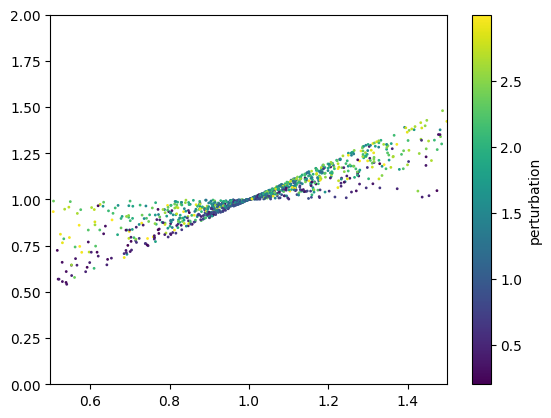

In [6]:
plt.scatter(u_e1_s1_j5['rel_s1'], u_e1_s1_j5['relative_flux_J5'], c=u_e1_s1_j5['perturbation'], s=1)
plt.xlim(0.5,1.5)
plt.ylim(0,2)
plt.colorbar(label='perturbation')

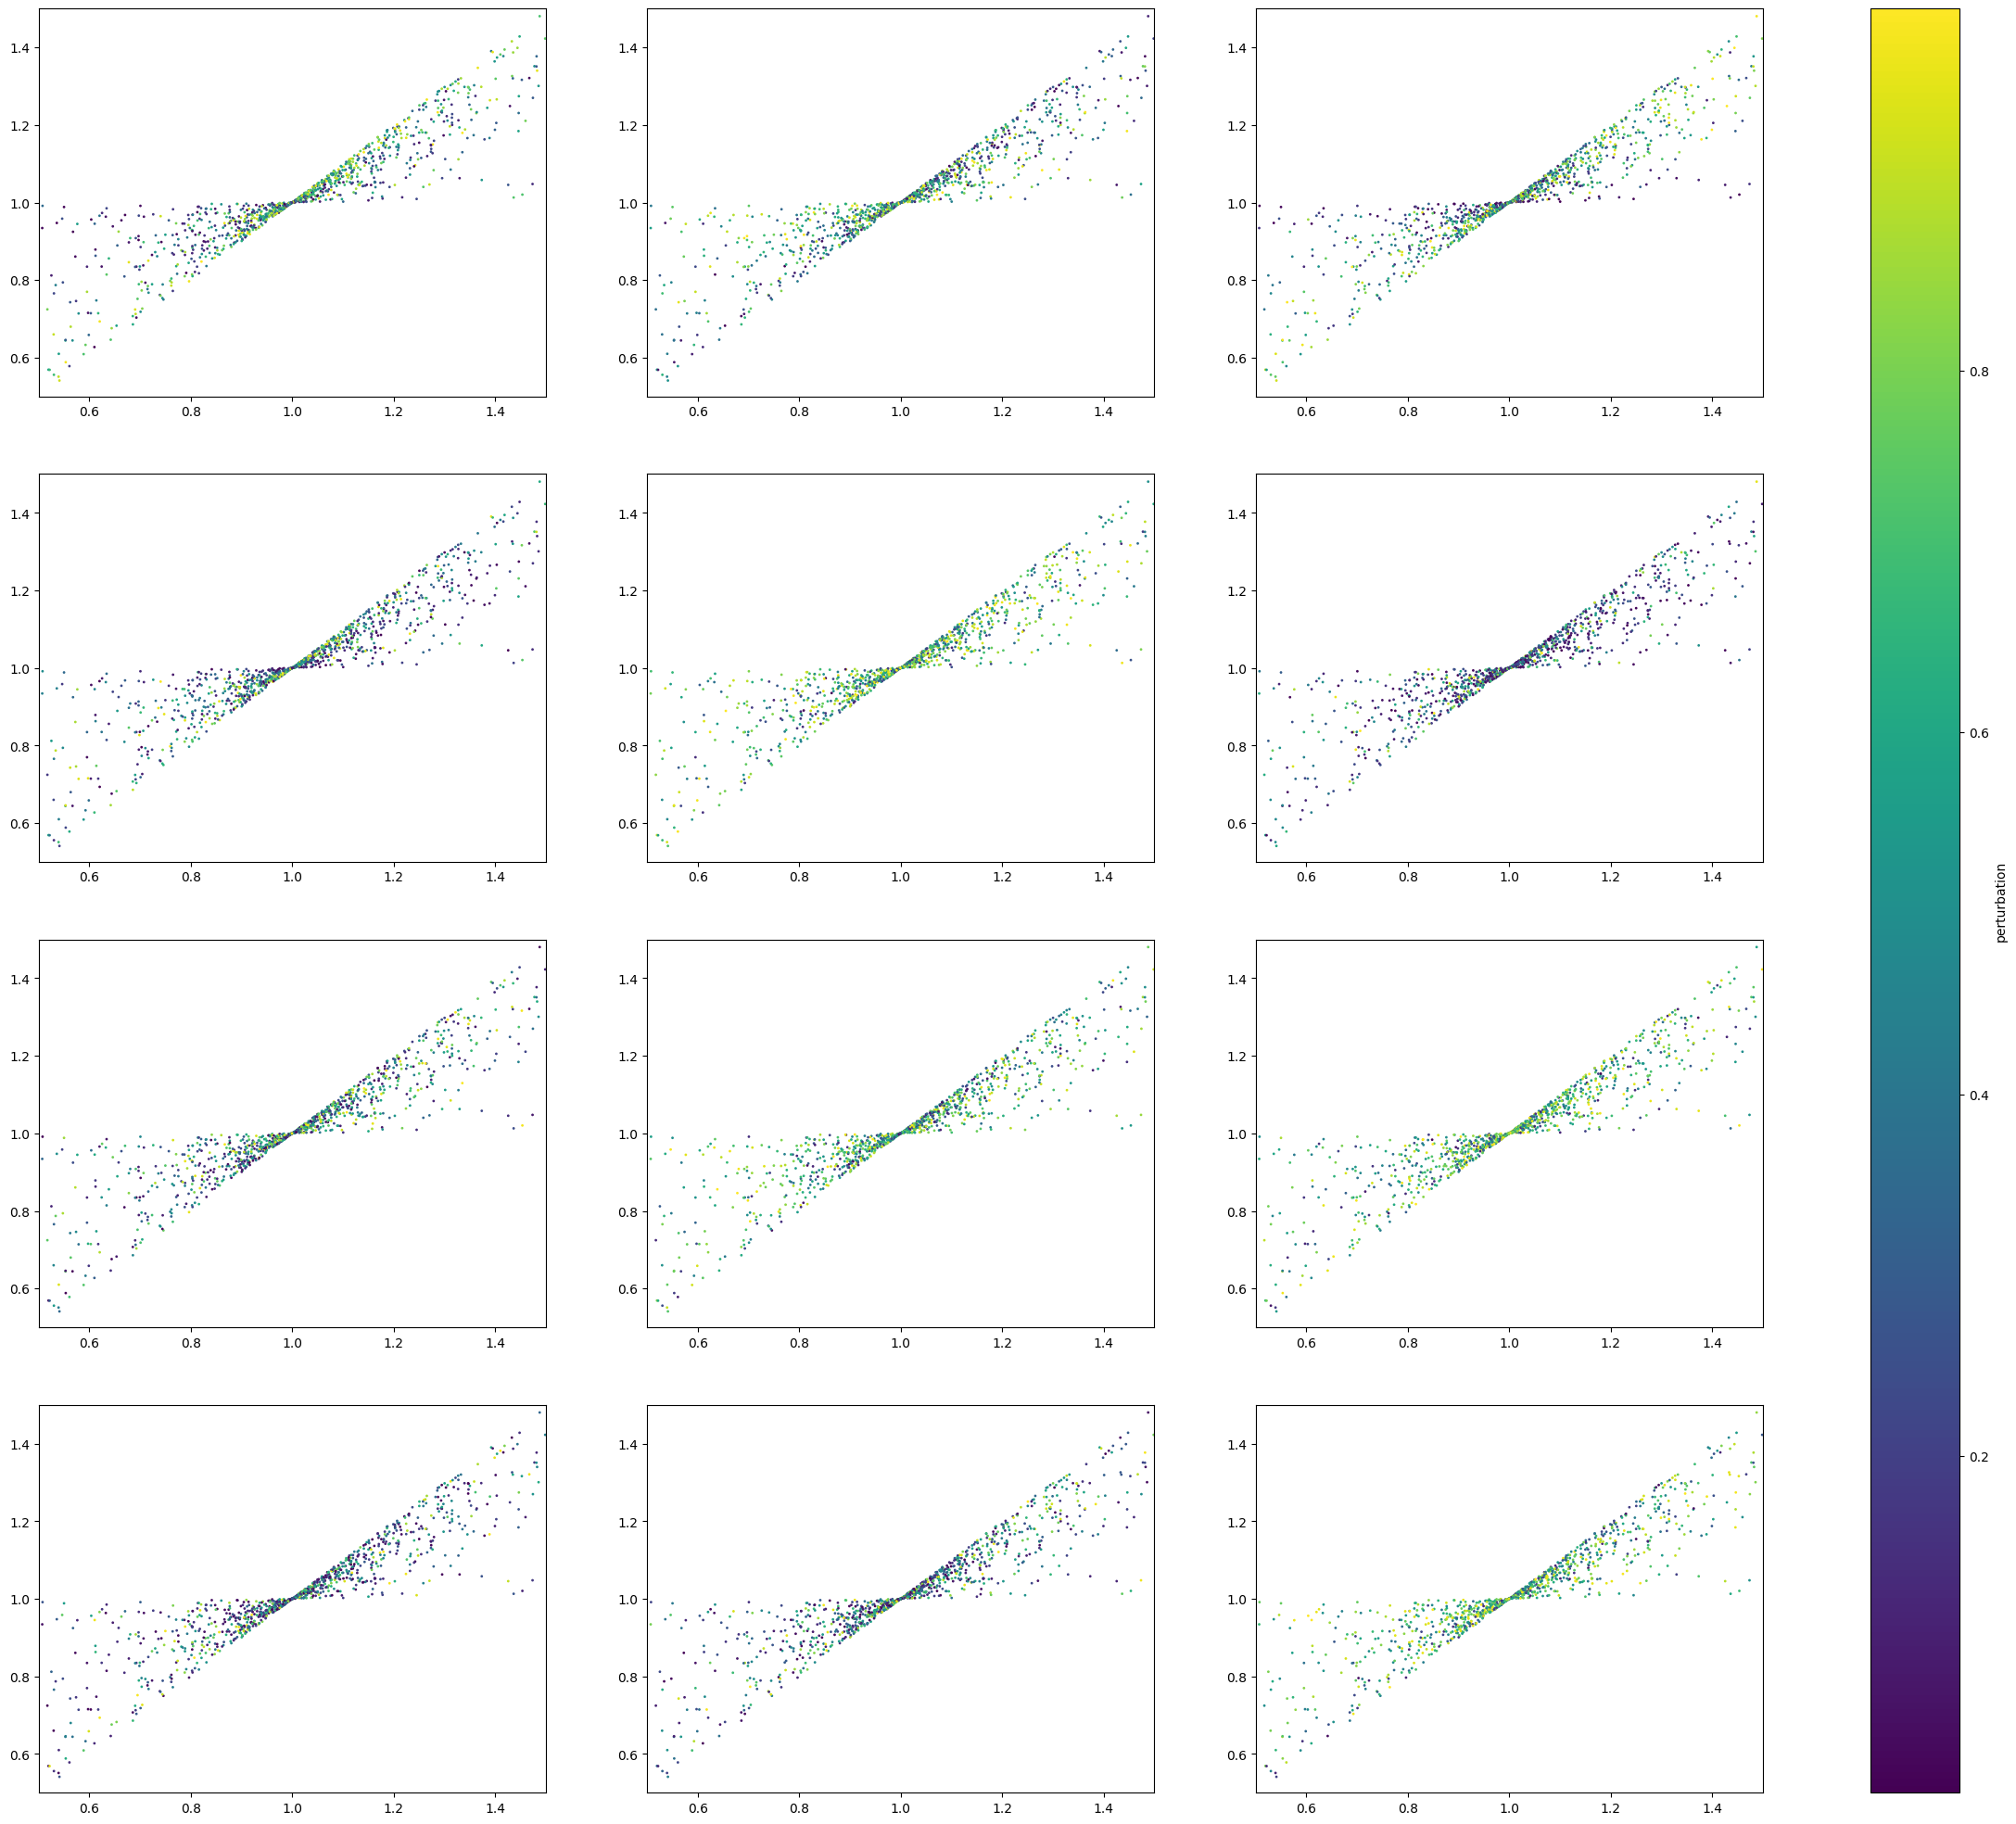

In [20]:
fig, axs = plt.subplots(4, 3, figsize=(30, 25))
k_set = ['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'k11', 'k12']

for i, kvalue in enumerate(k_set):
    row = int(i / 3)
    col = i % 3
    sc = axs[row, col].scatter(u_e1_s1_j5['rel_s1'], u_e1_s1_j5['relative_flux_J5'], c=u_e1_s1_j5[kvalue], s=1)
    axs[row, col].set_xlim(0.5,1.5)
    axs[row, col].set_ylim(0.5,1.5)
plt.colorbar(sc, ax=axs, label='perturbation')